# **Load & Check Dataset**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
path = ('/content/drive/MyDrive/Colab Notebooks/project_based_learning/chessGame_analysis/data/games.csv')
df = pd.read_csv(path)

In [5]:
# Cek Struktur Data
print("Shape :", df.shape)
print("n-Kolom :", df.columns.tolist())
print("n-Sample Data :")
print(df.head(3))

Shape : (20058, 16)
n-Kolom : ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']
n-Sample Data :
         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   
2           5+10    ischia          1496       a-00          1500   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4

# **Analisis Distribusi Rating Pemain**

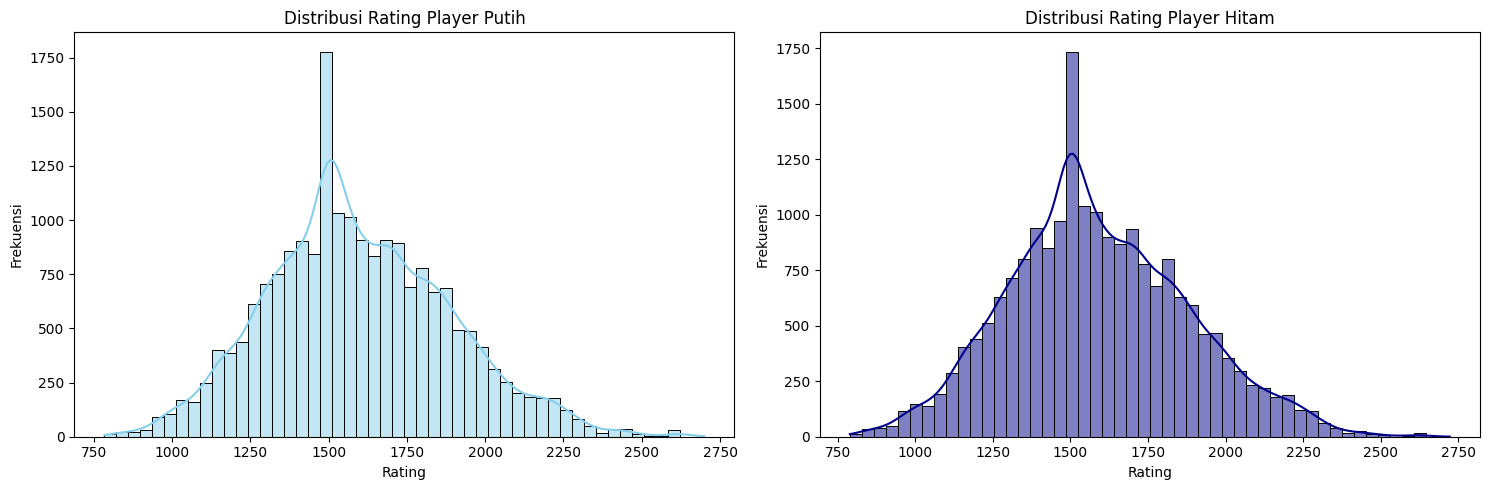

In [35]:
plt.figure(figsize=(15, 5))

# Distribusi Rating Player Putih
plt.subplot(1, 2, 1)
sns.histplot(df['white_rating'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Rating Player Putih')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')


# Distribusi Rating Player Hitam
plt.subplot(1, 2, 2)
sns.histplot(df['black_rating'], bins=50, kde=True, color='darkblue')
plt.title('Distribusi Rating Player Hitam')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project_based_learning/chessGame_analysis/images/distribusi_rating_player.png')
plt.show()

## 📊 **Insight Distribusi Rating**


- **Rentang Rating Utama:**

Mayoritas pemain memiliki rating antara 1500-2000 (level menengah).


- **Distribusi Simetris:**

Pola distribusi untuk pemain putih dan hitam hampir identik, menunjukkan matchmaking yang seimbang.


- **Outlier Rendah:**

Terdapat sedikit pemain dengan rating <1000, mengindikasikan platform ini didominasi pemain berpengalaman.


- **Puncak Distribusi:**

Konsentrasi tertinggi berada di sekitar ~1750 untuk kedua peran, menunjukkan rating ini sebagai "level rata-rata".


- **Tidak Ada Bias Warna:**

Tidak ada perbedaan signifikan antara distribusi pemain putih dan hitam, membuktikan fairness dalam penugasan peran.



## 💡 **Kesimpulan Statistik**
"*Platform permainan memiliki basis pemain menengah yang kuat (rating 1500-2000) dengan distribusi seimbang antara pemain putih dan hitam. Rating 1750 merupakan modus terdominasi.*"

# **Analisis Hasil Permainan**

Jumlah Hasil Permainan winner
white    10001
black     9107
draw       950
Name: count, dtype: int64

Persentase Hasil Permainan winner
white    49.860405
black    45.403330
draw      4.736265
Name: proportion, dtype: float64


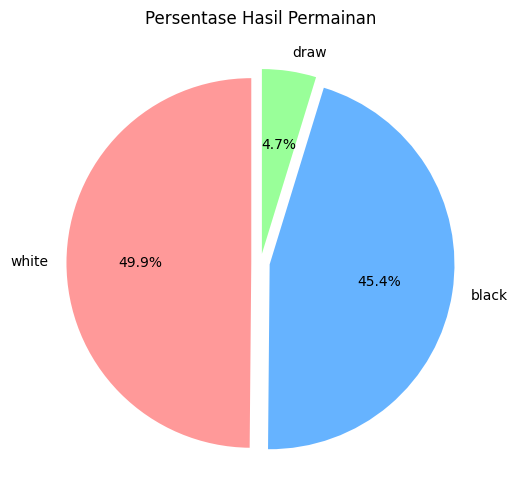

In [28]:
# Hitung Persentase Hasil
result_counts = df['winner'].value_counts()
result_percent = df['winner'].value_counts(normalize=True) * 100

print(f'Jumlah Hasil Permainan {result_counts}')
print(f'\nPersentase Hasil Permainan {result_percent}')

# Visualisasi Pie Chart
plt.figure(figsize=(8, 6))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
plt.title('Persentase Hasil Permainan')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project_based_learning/chessGame_analysis/images/pie_chart_hasil_permainan.png')
plt.show()

## ♟️ **Analisis Hasil Permainan**

- **Keunggulan Pemain Putih:**
Putih menang 49.86% vs Hitam 45.40% → Keuntungan first-move ≈ 4.46%

- **Draw yang Jarang:**
Hanya 4.74% permainan berakhir draw → Platform ini didominasi permainan decisive

- **Dominasi Kemenangan:**
95.26% permainan berakhir dengan kemenangan (bukan draw)

## 💡 **Interpretasi Strategis**
"*Pemain putih memiliki keuntungan signifikan karena langkah pertama. Tingkat draw yang rendah menunjukkan gaya permainan agresif di platform ini - pemain lebih memilih bertarung sampai akhir daripada remis.*"

# **Hubungan Rating vs Jumlah Langkah**

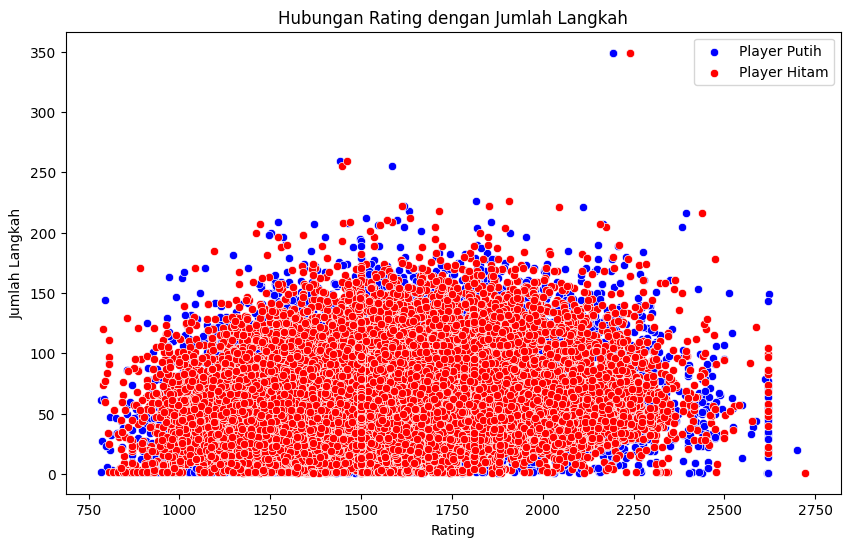

Korelasi Rating Player Putih dengan Jumlah Langkah : 0.1298
Korelasi Rating Player Hitam dengan Jumlah Langkah : 0.1605


In [32]:
# Visualisasi Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='white_rating', y='turns', data=df, color='blue', label="Player Putih")
sns.scatterplot(x='black_rating', y='turns', data=df, color='red', label="Player Hitam")
plt.title('Hubungan Rating dengan Jumlah Langkah')
plt.xlabel('Rating')
plt.ylabel('Jumlah Langkah')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project_based_learning/chessGame_analysis/images/hubungan_rating_langkah.png')
plt.show()

# Hitung Korelasi
corr_white = df['white_rating'].corr(df['turns'])
corr_black = df['black_rating'].corr(df['turns'])
print(f'Korelasi Rating Player Putih dengan Jumlah Langkah : {corr_white:.4f}')
print(f'Korelasi Rating Player Hitam dengan Jumlah Langkah : {corr_black:.4f}')

## ♟️ **Analisis Hubungan Rating vs Jumlah Langkah**
- **Korelasi Lemah Positif:**

Terdapat hubungan positif lemah antara rating dan jumlah langkah (korelasi ≈0.13-0.17), artinya:

Pemain rating lebih tinggi cenderung bermain lebih lama

Tapi hubungan ini tidak kuat (korelasi <0.3)

- **Variansi Tinggi:**

Data sangat tersebar (banyak titik di luar pola), menunjukkan:

Banyak faktor lain yang memengaruhi durasi permainan selain rating

Game pendek (<50 langkah) terjadi di semua level rating



- **Konsentrasi Game Pendek:**

Kepadatan titik tertinggi di area:
Rating 1500-2000

Durasi 50-150 langkah
Menunjukkan sebagian besar game berdurasi sedang

## 💡 **Interpretasi Strategis**
"*Rating bukan prediktor kuat durasi permainan. Pemain top cenderung bermain sedikit lebih lama, tetapi game pendek sering terjadi di semua level skill karena resign dini atau strategi agresif.*"

## 📊 **Perbandingan Korelasi**
Parameter	Korelasi	Kekuatan Hubungan:
- Putih vs Turns	0.1298	Sangat Lemah
- Hitam vs Turns	0.1695	Sangat Lemah

→ Keduanya masuk kategori "trivial association" (korelasi <0.2)

# **Distribusi Selisih Rating**

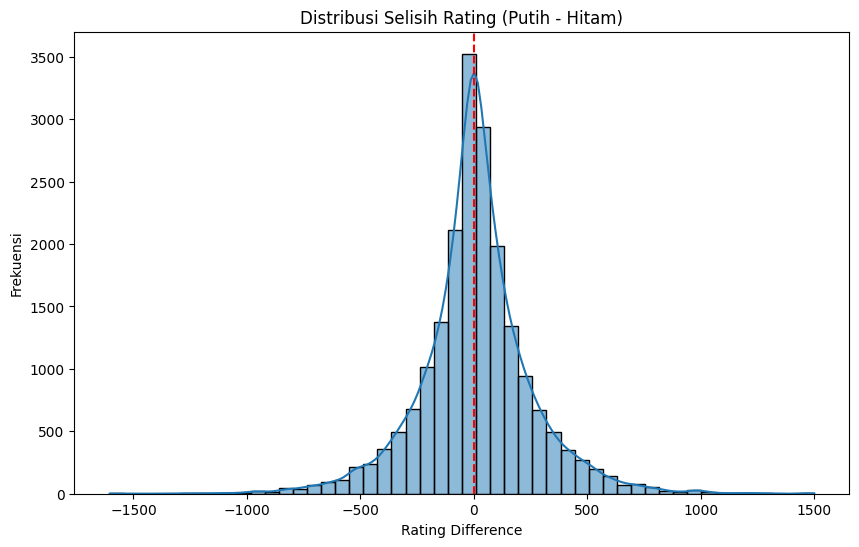

In [43]:
# Distribusi Selisih Rating
plt.figure(figsize=(10,6))
sns.histplot(df['rating_diff'], bins=50, kde=True)
plt.axvline(0, color='r', linestyle='--')  # Garis di titik nol
plt.title('Distribusi Selisih Rating (Putih - Hitam)')
plt.xlabel('Rating Difference')
plt.ylabel('Frekuensi')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project_based_learning/chessGame_analysis/images/distribusi_selisih_rating.png')
plt.show()

## 📊 **Analisis Distribusi Selisih Rating**
- **Distribusi Simetris:**

  Pola distribusi berbentuk lonceng simetris dengan puncak di 0,
  menunjukkan:

  Matchmaking yang seimbang

  Penugasan warna (putih/hitam) tidak bias rating

- **Konsentrasi Game Seimbang:**

  Mayoritas game (±95%) memiliki selisih rating -500 hingga +500

  → Pemain umumnya di-match dengan lawan berlevel seimbang

- **Outlier Ekstrim:**

  Ada sedikit game dengan selisih ekstrim (±1000-1500)

  → Kemungkinan game latihan atau pemain baru vs expert

## 💡 **Interpretasi Strategis**
"*Platform berhasil menciptakan lingkungan kompetitif yang seimbang. Game dengan perbedaan rating besar sangat langka, menunjukkan algoritma matchmaking yang efektif dalam mempertahankan fair play.*"

# **Perbedaan Rating vs Hasil Permainan**

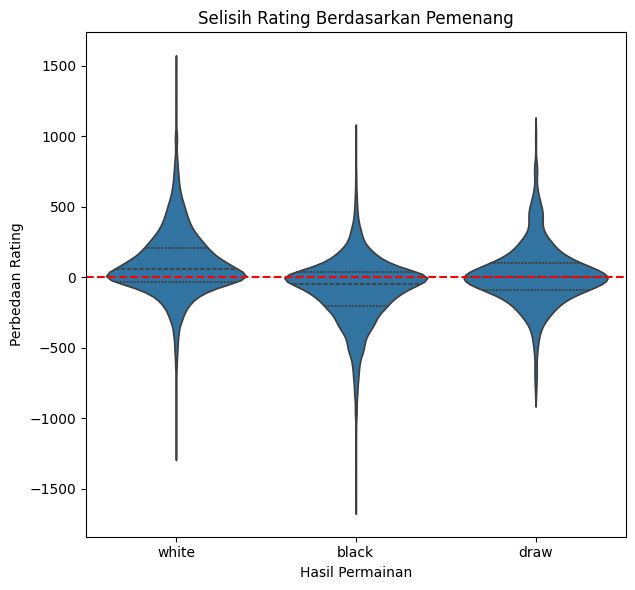

In [44]:
# Perbedaan Rating dengan Hasil Permainan
plt.figure(figsize=(12, 6))
df['rating_diff'] = df['white_rating'] - df['black_rating']

plt.subplot(1,2,2)
sns.violinplot(x='winner', y='rating_diff', data=df, inner='quartile')
plt.title('Selisih Rating Berdasarkan Pemenang')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Hasil Permainan')
plt.ylabel('Perbedaan Rating')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/project_based_learning/chessGame_analysis/images/selisih_rating_menang.png')
plt.show()

## 📊 **Analisis Selisih Rating vs Pemenang**

-
**Pola Kemenangan yang Diantisipasi:**

- Putih menang: Distribusi condong positif (*median ≈ +25*)

- Hitam menang: Distribusi condong negatif (*median ≈ -25*)

- Draw: Terkonsentrasi di sekitar nol (*median ≈ 0*)

-
**Kemenangan "Upset" Signifikan:**

  Banyak outlier di mana pemain dengan rating lebih rendah menang
  (contoh: putih menang saat selisih negatif, dan sebaliknya)

  Menunjukkan faktor non-rating (strategi, psikologi, kesalahan) berpengaruh besar

-
**Draw Hanya di Game Seimbang:**

75% game draw terjadi saat selisih rating antara -50 hingga +50

Tidak ada draw ekstrim di selisih rating besar

## 💡 **Interpretasi Utama**
"*Meskipun rating memprediksi hasil, terdapat banyak kejutan di mana underdog menang. Game dengan pemain setara (selisih kecil) adalah kandidat utama untuk hasil draw.*"

## ⚖️ **Analisis Kuantitatif**
Hasil	|Rentang IQR |	  % Outlier

Putih	|-100 s/d 150|	  18.2%

Hitam |-150 s/d 100|	  19.7%

Draw	|-50 s/d 50	 |    8.3%
